# Bagging Intro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
data['Species'] = load_iris().target
data = data[['sepal width (cm)', 'petal length (cm)', 'Species']]
data.head()

,sepal width (cm),petal length (cm),Species
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


In [3]:
# Randomizing the data (cuz all 0s, 1s, and 2s are together)
data = data.sample(data.shape[0])

# Creating train and test sets
train_set = data.sample(120)
test_set = data.sample(30)

# Bagging
#### Data randomly chosen with replacement for each model
#### Row sampling with replacement

In [4]:
# creating 3 identical models

from sklearn.tree import DecisionTreeClassifier    # decision tree - low bias, high variance 

dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()

In [5]:
# splitting train data for the 3 models (with replacement) 

train_set_1 = data.sample(50, replace=True)    # replace=True - a model can get the same row more than once as well 
train_set_2 = data.sample(50, replace=True)
train_set_3 = data.sample(50, replace=True)

X_train_1, y_train_1 = train_set_1.drop(columns='Species').values, train_set_1['Species'].values
X_train_2, y_train_2 = train_set_2.drop(columns='Species').values, train_set_2['Species'].values
X_train_3, y_train_3 = train_set_3.drop(columns='Species').values, train_set_3['Species'].values

In [6]:
# training each model on its datasets

dt1.fit(X_train_1, y_train_1)
dt2.fit(X_train_2, y_train_2)
dt3.fit(X_train_3, y_train_3)

DecisionTreeClassifier()

### Evaluation

In [7]:
def eval_model(model, X_train, y_train):

    X_test, y_test = test_set.drop(columns='Species'), test_set['Species']
    
    y_pred = model.predict(X_test.values)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy :', acc)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    plot_decision_regions(X=X_test.values, y=y_test.values, clf=model, ax=ax[0])
    plot_tree(model, ax=ax[1])

Accuracy : 0.9666666666666667


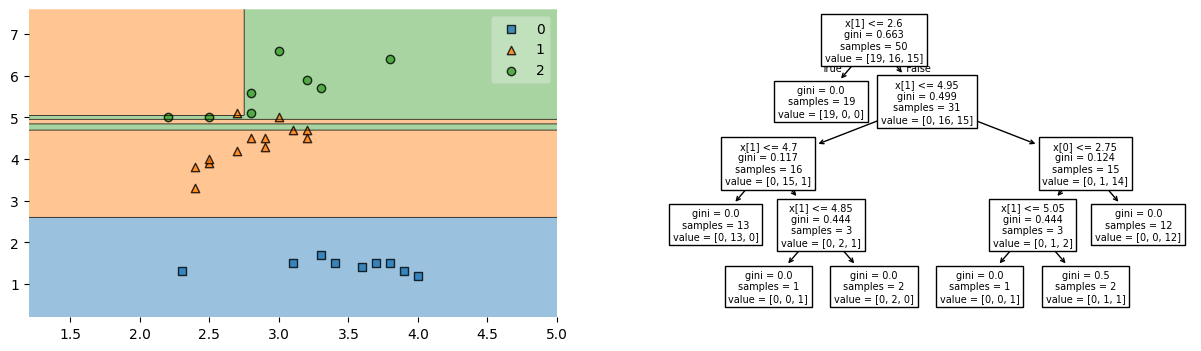

In [8]:
eval_model(dt1, X_train_1, y_train_1)

Accuracy : 0.9


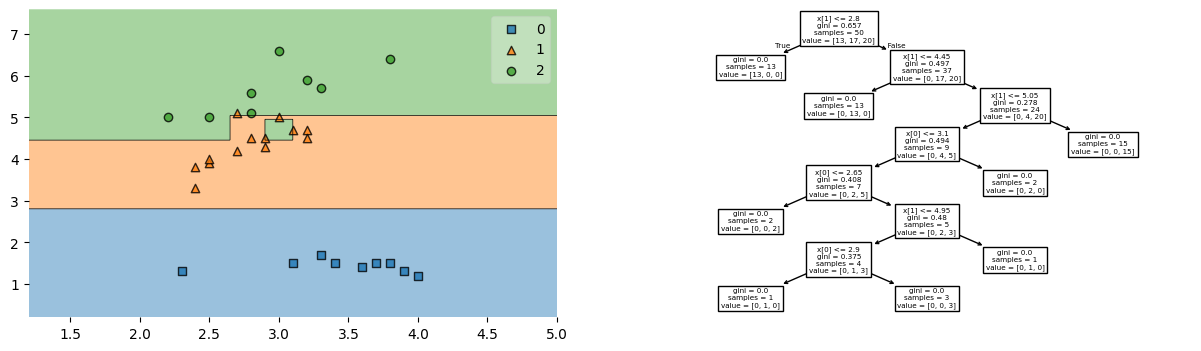

In [9]:
eval_model(dt2, X_train_2, y_train_2)

Accuracy : 0.8666666666666667


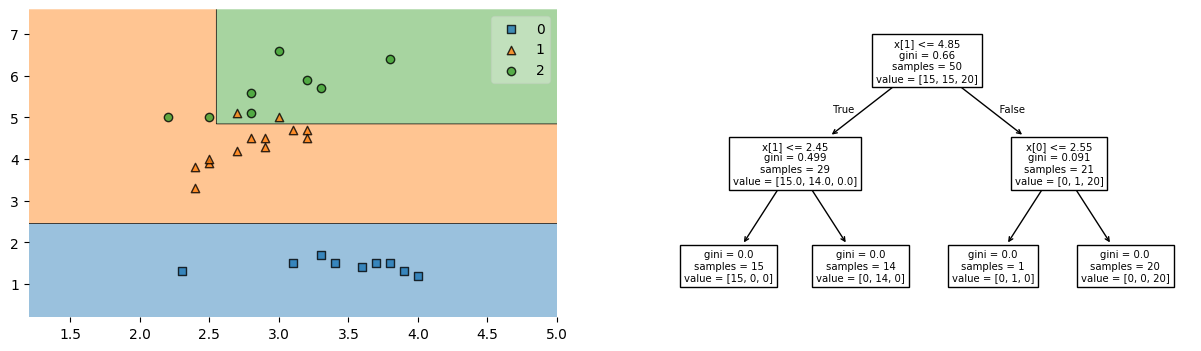

In [10]:
eval_model(dt3, X_train_3, y_train_3)

### Prediction

In [11]:
# let us take a random value

x = [[2.3, 5]]

y_pred_1 = dt1.predict(x)
y_pred_2 = dt2.predict(x)
y_pred_3 = dt3.predict(x)

from scipy.stats import mode

print(f'''
Model 1 : {y_pred_1}
Model 2 : {y_pred_2}
Model 3 : {y_pred_3}
Final Predicion (Majority Vote) : {mode([y_pred_1, y_pred_2, y_pred_3])[0].item()}
''')


Model 1 : [2]
Model 2 : [2]
Model 3 : [1]
Final Predicion (Majority Vote) : 2



# Pasting 
#### Row sampling without replacement

In [ ]:
train_set_1 = data.sample(50, replace=False)    # replace=False - default
train_set_2 = data.sample(50, replace=False)
train_set_3 = data.sample(50, replace=False)

# Random Subspaces
#### Column sampling (with or without replacement)

In [50]:
# Loading the data with all columns
data = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)    
data['Species'] = load_iris().target
data_X = data.drop(columns=['Species'])      

X_train_1 = data_X.sample(2, axis=1)    # axis=1 - along column
X_train_2 = data_X.sample(2, axis=1)
X_train_3 = data_X.sample(2, axis=1)

In [51]:
X_train_1.head(3)

,petal length (cm),sepal width (cm)
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2


In [52]:
X_train_2.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [53]:
X_train_1.head(3)

,petal length (cm),sepal width (cm)
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2


# Random Patches
#### Row + Column sampling (with or without replacement)

In [54]:
X_train_1 = data_X.sample(2, axis=1).sample(100)
X_train_2 = data_X.sample(2, axis=1).sample(100)
X_train_3 = data_X.sample(2, axis=1).sample(100)

In [56]:
X_train_1.head(3)

,petal width (cm),sepal width (cm)
45,0.3,3.0
119,1.5,2.2
118,2.3,2.6


In [57]:
X_train_2.head(3)

,sepal width (cm),petal width (cm)
56,3.3,1.6
63,2.9,1.4
10,3.7,0.2


In [58]:
X_train_3.head(3)

,sepal width (cm),petal length (cm)
81,2.4,3.7
45,3.0,1.4
149,3.0,5.1
